In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [5]:
data=pd.read_csv('amazon_laptop_price_dataset.csv')
df=pd.DataFrame(data)
df.head()

,Brand,Processor,RAM_GB,Storage_GB,Operating_System,GPU,Rating,Price_USD
0,MSI,AMD Ryzen 3,4,512,macOS,AMD Radeon,4.2,1092.04
1,Lenovo,Intel i7,32,128,macOS,NVIDIA GTX 1650,3.1,1934.84
2,Asus,AMD Ryzen 7,8,256,Windows 10,Integrated,3.6,758.86
3,Dell,Intel i7,16,512,Windows 11,AMD Radeon,3.6,1430.88
4,MSI,AMD Ryzen 7,8,512,Windows 11,NVIDIA RTX 3050,3.8,1457.77


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Brand             1000 non-null   object 
 1   Processor         1000 non-null   object 
 2   RAM_GB            1000 non-null   int64  
 3   Storage_GB        1000 non-null   int64  
 4   Operating_System  1000 non-null   object 
 5   GPU               1000 non-null   object 
 6   Rating            1000 non-null   float64
 7   Price_USD         1000 non-null   float64
dtypes: float64(2), int64(2), object(4)
memory usage: 62.6+ KB


In [7]:
df.isnull().sum()

Brand               0
Processor           0
RAM_GB              0
Storage_GB          0
Operating_System    0
GPU                 0
Rating              0
Price_USD           0
dtype: int64

In [8]:
df['Price_Rupees']=df['Price_USD']*92

In [9]:
df.head()

,Brand,Processor,RAM_GB,Storage_GB,Operating_System,GPU,Rating,Price_USD,Price_Rupees
0,MSI,AMD Ryzen 3,4,512,macOS,AMD Radeon,4.2,1092.04,100467.68
1,Lenovo,Intel i7,32,128,macOS,NVIDIA GTX 1650,3.1,1934.84,178005.28
2,Asus,AMD Ryzen 7,8,256,Windows 10,Integrated,3.6,758.86,69815.12
3,Dell,Intel i7,16,512,Windows 11,AMD Radeon,3.6,1430.88,131640.96
4,MSI,AMD Ryzen 7,8,512,Windows 11,NVIDIA RTX 3050,3.8,1457.77,134114.84


In [10]:
df.drop('Price_USD',axis=1,inplace=True)

In [11]:
df.head()

,Brand,Processor,RAM_GB,Storage_GB,Operating_System,GPU,Rating,Price_Rupees
0,MSI,AMD Ryzen 3,4,512,macOS,AMD Radeon,4.2,100467.68
1,Lenovo,Intel i7,32,128,macOS,NVIDIA GTX 1650,3.1,178005.28
2,Asus,AMD Ryzen 7,8,256,Windows 10,Integrated,3.6,69815.12
3,Dell,Intel i7,16,512,Windows 11,AMD Radeon,3.6,131640.96
4,MSI,AMD Ryzen 7,8,512,Windows 11,NVIDIA RTX 3050,3.8,134114.84


<Axes: >

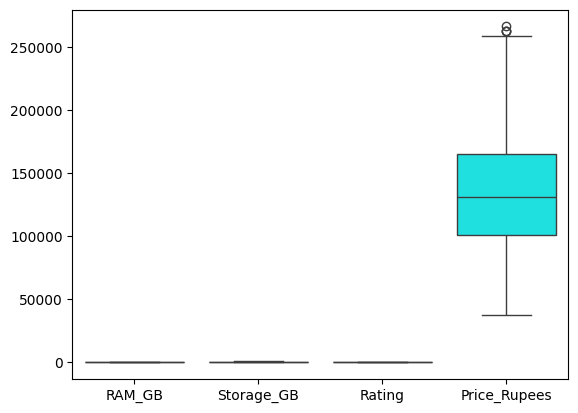

In [12]:
sns.boxplot(data=df,color='cyan')

In [13]:
Q1=df['Price_Rupees'].quantile(0.25)
Q3=df['Price_Rupees'].quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR
df=df[(df['Price_Rupees'] >= lower_bound) &(df['Price_Rupees']<= upper_bound)]

In [14]:
df

,Brand,Processor,RAM_GB,Storage_GB,Operating_System,GPU,Rating,Price_Rupees
0,MSI,AMD Ryzen 3,4,512,macOS,AMD Radeon,4.2,100467.68
1,Lenovo,Intel i7,32,128,macOS,NVIDIA GTX 1650,3.1,178005.28
2,Asus,AMD Ryzen 7,8,256,Windows 10,Integrated,3.6,69815.12
3,Dell,Intel i7,16,512,Windows 11,AMD Radeon,3.6,131640.96
4,MSI,AMD Ryzen 7,8,512,Windows 11,NVIDIA RTX 3050,3.8,134114.84
...,...,...,...,...,...,...,...,...
995,Dell,Intel i5,8,1024,Windows 10,NVIDIA GTX 1650,3.7,156448.76
996,Apple,AMD Ryzen 5,8,256,Windows 10,NVIDIA GTX 1650,3.1,141207.12
997,Apple,AMD Ryzen 5,32,512,Windows 10,Integrated,3.6,193303.96
998,Dell,AMD Ryzen 5,32,128,Windows 11,Integrated,3.3,118588.92


<Axes: >

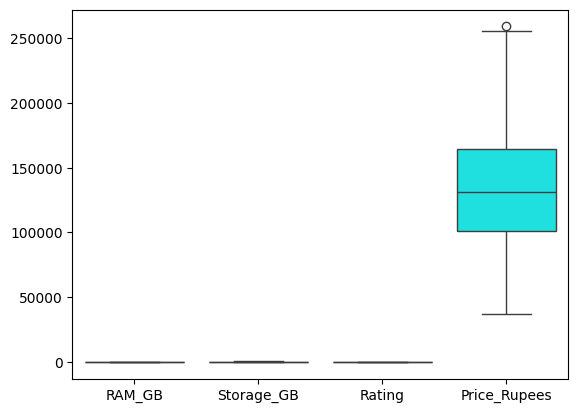

In [15]:
sns.boxplot(data=df,color='cyan')

In [16]:
df.nunique()

Brand                 7
Processor             6
RAM_GB                4
Storage_GB            4
Operating_System      3
GPU                   4
Rating               21
Price_Rupees        989
dtype: int64

In [17]:
df.Brand.value_counts()

Brand
Apple     154
MSI       149
Asus      144
Dell      144
Acer      142
HP        132
Lenovo    131
Name: count, dtype: int64

In [18]:
col=['Brand','Processor','Operating_System']
for c in col:
    print(df[c].value_counts())


Brand
Apple     154
MSI       149
Asus      144
Dell      144
Acer      142
HP        132
Lenovo    131
Name: count, dtype: int64
Processor
AMD Ryzen 7    182
Intel i5       176
AMD Ryzen 5    173
AMD Ryzen 3    158
Intel i7       157
Intel i3       150
Name: count, dtype: int64
Operating_System
Windows 11    345
Windows 10    326
macOS         325
Name: count, dtype: int64


In [19]:
df.Operating_System.unique()

array(['macOS', 'Windows 10', 'Windows 11'], dtype=object)

In [20]:
mapping={
    'Windows 10':'Windows',
    'Windows 11':'Windows',
    'macOS':'macOS',
}
df['Operating_System']=df['Operating_System'].map(mapping)

In [21]:
df.Operating_System.unique()

array(['macOS', 'Windows'], dtype=object)

In [22]:
df.Processor.unique()

array(['AMD Ryzen 3', 'Intel i7', 'AMD Ryzen 7', 'Intel i5', 'Intel i3',
       'AMD Ryzen 5'], dtype=object)

In [23]:
mapping={
    'AMD Ryzen 7' : '7',
    'Intel i5' : '5',
    'AMD Ryzen 5' :'5',
    'AMD Ryzen 3' : '3',
    'Intel i7' : '7',
    'Intel i3': '3'
}
df['Processor']=df['Processor'].map(mapping)

In [24]:
df.Processor.unique()

array(['3', '7', '5'], dtype=object)

In [25]:
df.GPU.unique()

array(['AMD Radeon', 'NVIDIA GTX 1650', 'Integrated', 'NVIDIA RTX 3050'],
      dtype=object)

In [26]:
mapping={
    'AMD Radeon' : '1',
    'NVIDIA GTX 1650' : '2',
    'Integrated' :'0',
    'NVIDIA RTX 3050' : '3',
}
df['GPU']=df['GPU'].map(mapping)

In [27]:
df.GPU.value_counts()

GPU
0    277
1    268
3    244
2    207
Name: count, dtype: int64

In [28]:
df.head()

,Brand,Processor,RAM_GB,Storage_GB,Operating_System,GPU,Rating,Price_Rupees
0,MSI,3,4,512,macOS,1,4.2,100467.68
1,Lenovo,7,32,128,macOS,2,3.1,178005.28
2,Asus,7,8,256,Windows,0,3.6,69815.12
3,Dell,7,16,512,Windows,1,3.6,131640.96
4,MSI,7,8,512,Windows,3,3.8,134114.84


In [29]:
# Task 1: Brand column encoding using One Hot Encoding
from sklearn.preprocessing import OneHotEncoder

coder = OneHotEncoder(sparse_output=False)
brand_encoded = coder.fit_transform(df[['Brand']])

# Convert to DataFrame with proper column names
brand_df = pd.DataFrame(brand_encoded, columns=coder.get_feature_names_out(['Brand']), index=df.index)
brand_df

,Brand_Acer,Brand_Apple,Brand_Asus,Brand_Dell,Brand_HP,Brand_Lenovo,Brand_MSI
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,0.0,0.0,0.0
996,0.0,1.0,0.0,0.0,0.0,0.0,0.0
997,0.0,1.0,0.0,0.0,0.0,0.0,0.0
998,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [30]:
# Task 2: Add brand_encoded columns to the dataframe and drop original Brand column
df = pd.concat([df, brand_df], axis=1)
df.drop('Brand', axis=1, inplace=True)
df.head()

,Processor,RAM_GB,Storage_GB,Operating_System,GPU,Rating,Price_Rupees,Brand_Acer,Brand_Apple,Brand_Asus,Brand_Dell,Brand_HP,Brand_Lenovo,Brand_MSI
0,3,4,512,macOS,1,4.2,100467.68,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,7,32,128,macOS,2,3.1,178005.28,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,7,8,256,Windows,0,3.6,69815.12,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,7,16,512,Windows,1,3.6,131640.96,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,7,8,512,Windows,3,3.8,134114.84,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [31]:
# Task 3: Convert all columns to int/numeric
# Encode Operating_System using OneHotEncoder
from sklearn.preprocessing import OneHotEncoder

os_encoder = OneHotEncoder(sparse_output=False, drop='first')
os_encoded = os_encoder.fit_transform(df[['Operating_System']])
os_cols = os_encoder.get_feature_names_out(['Operating_System'])
os_df = pd.DataFrame(os_encoded, columns=os_cols, index=df.index)

# Add OS encoded columns and drop original
df = pd.concat([df, os_df], axis=1)
df.drop('Operating_System', axis=1, inplace=True)

# Convert Processor and GPU to int
df['Processor'] = df['Processor'].astype(int)
df['GPU'] = df['GPU'].astype(int)

# Convert brand one-hot columns to int
brand_cols = [col for col in df.columns if col.startswith('Brand_')]
df[brand_cols] = df[brand_cols].astype(int)

# Convert OS one-hot columns to int
os_col_list = [col for col in df.columns if col.startswith('Operating_System_')]
df[os_col_list] = df[os_col_list].astype(int)

df.dtypes

Processor                   int64
RAM_GB                      int64
Storage_GB                  int64
GPU                         int64
Rating                    float64
Price_Rupees              float64
Brand_Acer                  int64
Brand_Apple                 int64
Brand_Asus                  int64
Brand_Dell                  int64
Brand_HP                    int64
Brand_Lenovo                int64
Brand_MSI                   int64
Operating_System_macOS      int64
dtype: object

In [32]:
# Task 4: Divide data into X and y
x = df.drop('Price_Rupees', axis=1)
y = df['Price_Rupees']

print("X shape:", x.shape)
print("y shape:", y.shape)
x.head()

X shape: (996, 13)
y shape: (996,)


,Processor,RAM_GB,Storage_GB,GPU,Rating,Brand_Acer,Brand_Apple,Brand_Asus,Brand_Dell,Brand_HP,Brand_Lenovo,Brand_MSI,Operating_System_macOS
0,3,4,512,1,4.2,0,0,0,0,0,0,1,1
1,7,32,128,2,3.1,0,0,0,0,0,1,0,1
2,7,8,256,0,3.6,0,0,1,0,0,0,0,0
3,7,16,512,1,3.6,0,0,0,1,0,0,0,0
4,7,8,512,3,3.8,0,0,0,0,0,0,1,0


In [33]:
# Task 5: Split data into train and test (80/20)
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print("Train size:", x_train.shape)
print("Test size:", x_test.shape)

Train size: (796, 13)
Test size: (200, 13)


In [34]:
# Task 6: Load model, fit model, predict
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

print("First 5 Predictions:", y_pred[:5])
print("First 5 Actual:     ", y_test.values[:5])

First 5 Predictions: [183049.02777276 161086.11561988 192949.46498434 103305.09707727
 140323.76765968]
First 5 Actual:      [187756.36 164318.44 204357.76  97359.   136638.4 ]


In [35]:
# Task 7: MSE and MAE
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Squared Error (MSE):  {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")

Mean Squared Error (MSE):  61855971.86
Mean Absolute Error (MAE): 6292.56


In [36]:
# Task 8: R2 Score
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print(f"R2 Score: {r2:.4f}")
print(f"Model explains {r2*100:.2f}% of the variance in laptop prices")

R2 Score: 0.9712
Model explains 97.12% of the variance in laptop prices
